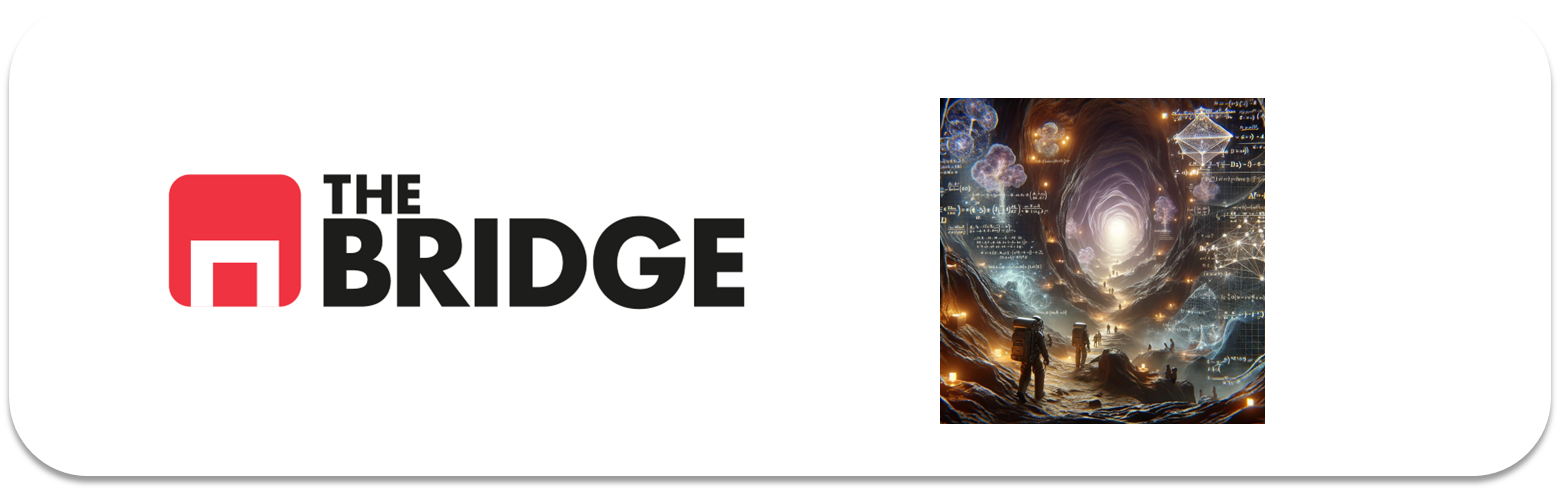

## 1. Perceptron

Lo primero que vamos a hacer es contruir un modelo supersencillo de clasificación empleando para ello un perceptrón tal y como lo vimos en las clases de teoría y que corresponde al esquema siguiente: 

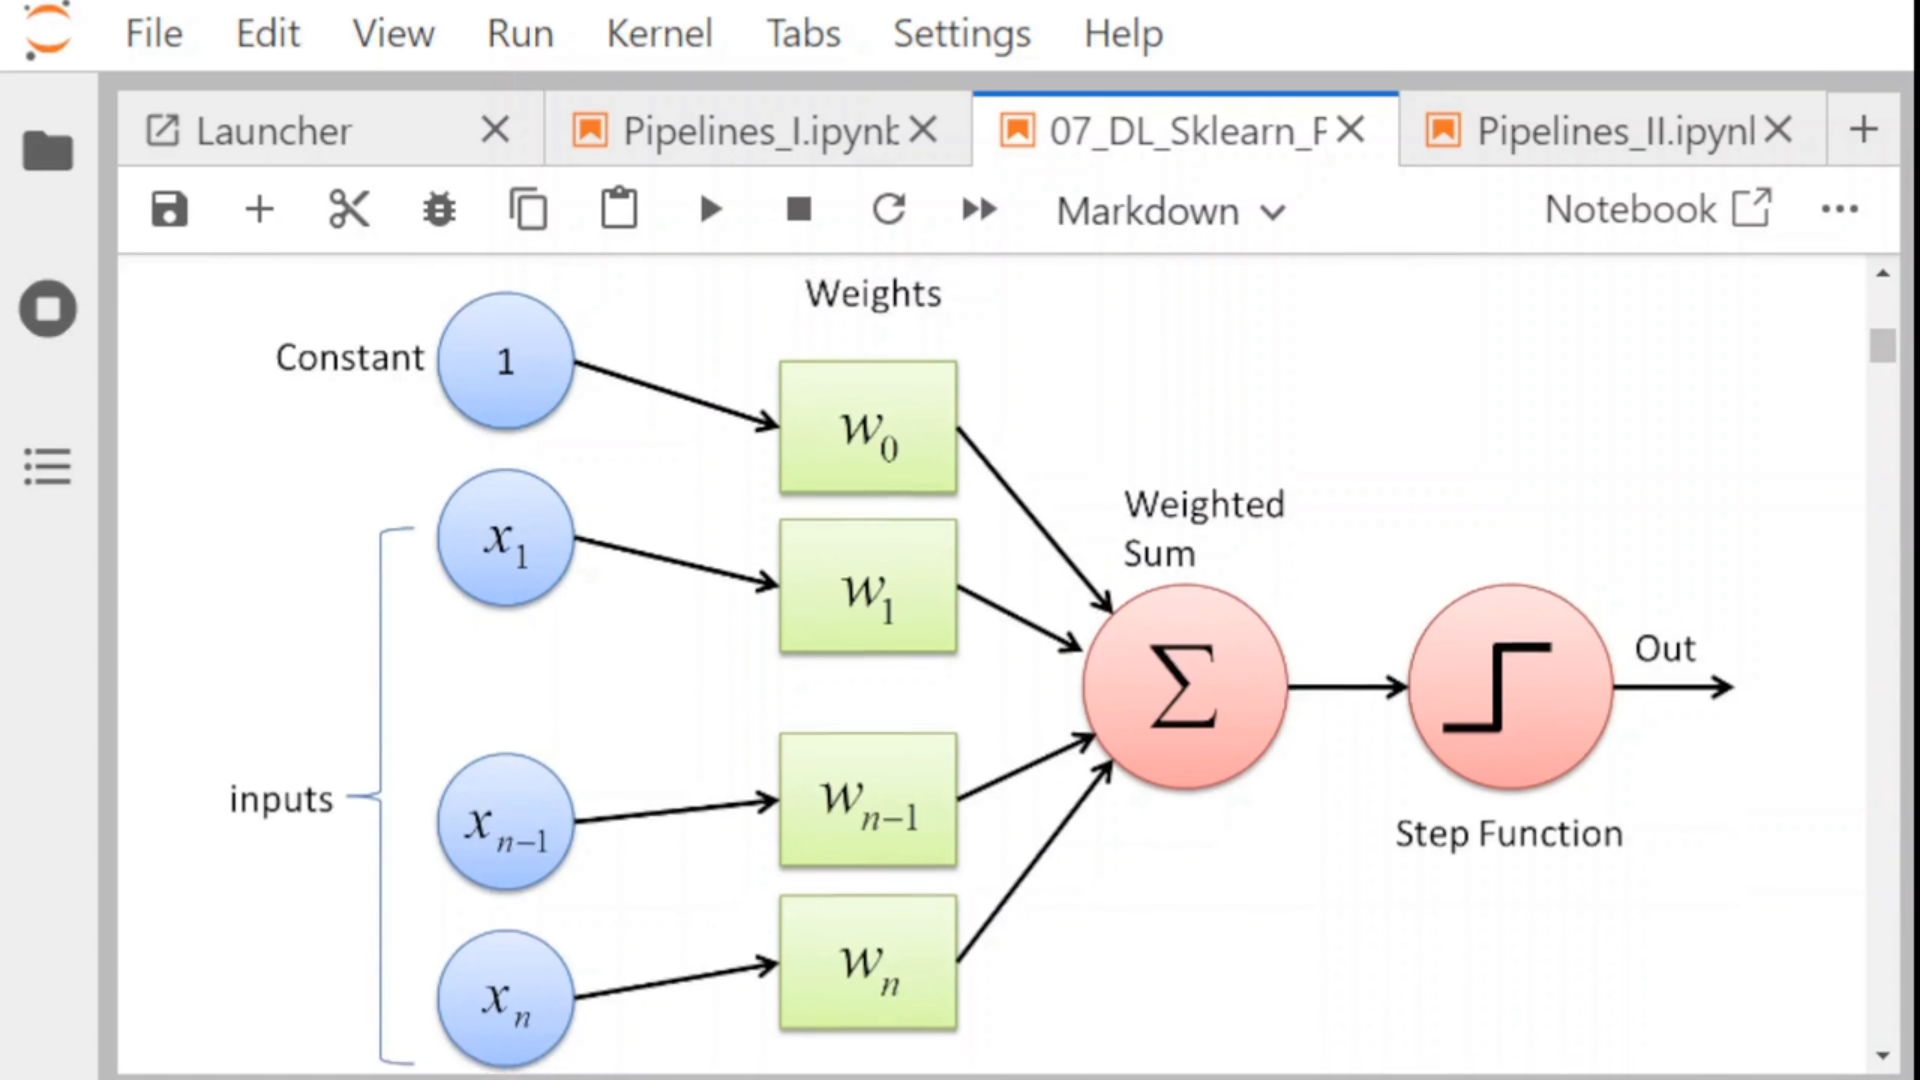



<img src="./img/perceptron-6168423.jpg" alt="drawing" width="650"/>


Recuerda que nuestras unidades o neuronas artificiales tienen una forma similar un conjunto de entradas que están multiplicadas por unos pesos y que todo se suma y se pasa luego por una función de activación, que en el caso de la figura es lo que se denomina una step function y que nosotros denominamos pulso en castellano. La salida $y$ del perceptrón de la figura sería la siguiente:

$$ z = w_0 + x_1 \cdot w_1 + x_2 \cdot w_2 + ... + x_n \cdot w_n \text { , donde z es la salida antes de la función de activación}$$
$$ y = 
\begin{cases} 
1 & \text{si } z > 0 \\
0 & \text{de lo contrario}
\end{cases}
$$

Repasado los conceptos vamos con el modelado.


Empezamos cargando librerias

In [1]:
'''
NOTA: Las implementaciones de sklearn de RRNN no soportan uso de GPU
Tampoco podemos cambiar las funciones de activacion ni pesos iniciales en CADA capa.
'''
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report

### El dataset

Cargamos datos. Utilizaremos el dataset de pinguinos de seaborn, conocido como "penguins".  

Es un conjunto de datos que contiene mediciones de tres especies diferentes de pingüinos encontrados en las islas cercanas a la Antártida. Las especies incluidas son: Adelie, Chinstrap y Gentoo. Este dataset se ha vuelto popular como una alternativa al clásico dataset de Iris para tareas de clasificación y visualización de datos en el aprendizaje automático.

Las variables presentes en el dataset incluyen:

- **species**: La especie del pingüino (Adelie, Chinstrap, Gentoo).
- **island**: La isla en la Antártida donde se observó el pingüino (Biscoe, Dream, o Torgersen).
- **bill_length_mm**: La longitud del pico del pingüino en milímetros.
- **bill_depth_mm**: La profundidad del pico del pingüino en milímetros.
- **flipper_length_mm**: La longitud de la aleta del pingüino en milímetros.
- **body_mass_g**: La masa corporal del pingüino en gramos.
- **sex**: El sexo del pingüino.



### Carga de datos y primer vistazo

In [2]:
df = sns.load_dataset("penguins")

# Limpiamos un poco los datos
df.dropna(inplace=True) # Quitamos nulos
cleanup_nums = {"species": {"Adelie": 0,
                            "Chinstrap": 1,
                            "Gentoo": 2},
               "sex": {"Male": 0,
                       "Female": 1}}
df.replace(cleanup_nums, inplace=True) # Siempre aprendiendo trucos nuevos
df = pd.get_dummies(df) # del manual:  If columns is None then all the columns with object, string, or category dtype will be converted. columns está a None por defecto

df.head()

/tmp/ipykernel_6731/481542248.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(cleanup_nums, inplace=True) # Siempre aprendiendo trucos nuevos


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,False,False,True
1,0,39.5,17.4,186.0,3800.0,1,False,False,True
2,0,40.3,18.0,195.0,3250.0,1,False,False,True
4,0,36.7,19.3,193.0,3450.0,1,False,False,True
5,0,39.3,20.6,190.0,3650.0,0,False,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    int64  
 6   island_Biscoe      333 non-null    bool   
 7   island_Dream       333 non-null    bool   
 8   island_Torgersen   333 non-null    bool   
dtypes: bool(3), float64(4), int64(2)
memory usage: 19.2 KB


333 instancias con 8 features no es un dataset de DL, pero para este ejercicio de fijación de conceptos nos vale.

### Dividimos en train test

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:] # Otra formas de quitar el target
y = df.iloc[:, 0] # y de quedárselo

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 8)
(67, 8)
(266,)
(67,)


Veamos la distribución del target

In [6]:
df.species.value_counts(True)

species
0    0.438438
2    0.357357
1    0.204204
Name: proportion, dtype: float64

Desbalanceado en favor de la clase 0 y 2 en detrimento de la 1. Habrá que tenerlo en cuenta. Ahora vendría normalizar e incluso siendo tan pequeño podríamos hacer hasta un miniEda, pero vamos a ir en plan DL full mode y vamos directo a entrenar.


Un detalle, el análisis del target del train siempre hay que hacerlo (aunque sea DL)

### Creando el Perceptrón

Tan simple como importar desde sklearn y sin tocar nada...

In [7]:
'''
Algoritmo de clasificación. El score es el accuracy.
Sale muy malo, ¿el perceptron no es capaz de diferenciar las clases?
'''

from sklearn.linear_model import Perceptron


per_clf = Perceptron()
per_clf.fit(X_train, y_train)
per_clf.score(X_test, y_test)

0.34328358208955223

El perceptrón de primeras sólo sirve para clasificar y por tanto su score es un score de accuracy. Podemo ver su report:

In [8]:
print(classification_report(y_test, per_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        13
           2       0.34      1.00      0.51        23

    accuracy                           0.34        67
   macro avg       0.11      0.33      0.17        67
weighted avg       0.12      0.34      0.18        67



/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Un desastre que curiosamente se ha centrado en la clase 2, la minoritaria...

In [9]:
'''
Una simple regresión logistica las diferencia mejor
'''
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

1.0
1.0


Bien está claro que así no vamos muy lejos, pero recuerda que **deberíamos haber escalado**:

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(X_train)

MinMaxScaler()

Hemos empleado el minmax porque tenemos variables categóricas con valores 0,1 y así igualamos todas las escalas. Pero podría haber usado un `StandarScaler`

In [11]:
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)
per_clf = Perceptron()
per_clf.fit(X_train_scaled, y_train)
per_clf.score(X_test_scaled, y_test)

1.0

Con el escalado todo ha cambiado. Aún así, imaginemos que no hubiera salido bien, tendríamos que probar con configuraciones más complejas como es por ejemplo el uso de una red densa como un MLP. Lo vemos en la siguientes sesión.

## 2. Multi Layer Perceptron

Esta vez vamos a emplear un MLP muy sencillo con una única capa oculta de 100 neuronas. Lo haremos con sklearn:

In [14]:
from sklearn.neural_network import MLPClassifier # Fijate que sklearn sí que distingue entre clasificador y regresor. No tendremos que hacerlo nosotros.
from sklearn.neural_network import MLPRegressor # TB existe. No se usa en este ejemplo

'''
Por defecto una capa con 100 neuronas
3 capas: input, una hidden y output
'''
mlp = MLPClassifier(max_iter=50)#numero de epocas 


Probamos así sin tocar ningún hiperparametro, ¿qué estamos haciendo?

In [15]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 50,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Ahí lo tienes. En concreto:

Topologícamente: Una capa oculta con 100 neuronas, cuya función de activación es "RELU", con batch_size a "auto" que quiere decir que estamos usando 200 instancias (este no nos gusta), learning rate a 0.001 y constante (usa un Adam de optimizador con momento y nesterov, ya lo trataremos con más cariño) y algunos hiperparámetros más que iremos tratando a medida  que avancemos más. Pero vemos que tenemos mucho juego a pesar de no ser  de lo más famosos de sklearn.

In [18]:
mlp = MLPClassifier(max_iter=50, batch_size = 32)

Entrenemos y comprobemos

In [19]:
mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.631578947368421
0.6716417910447762


¿Qué tal? No sé como habrá ido, pero vamos a probar un par de veces más a ver qué ocurre con los resultados...

Probablemente estes viendo que no son nada estables...

Antes de intentar mejorarlo igual que hicimos con su hermano pequeño el perceptrón vamos a construirnos nuestra propia red usando las posibilidades de este MLPClassifier.

Probemos otra configuración. Es posible crear una red neuronal desde la propia función de MLPClassifier()  
Construyamos la siguiente red  
<img src="./img/mi_primer_dl.png" alt="drawing" width="650"/>

In [28]:
mlp = MLPClassifier(max_iter=500,
                   activation='tanh',
                   hidden_layer_sizes = (150, 150, 150))

mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.6654135338345865
0.6865671641791045


Vaya sigue igual, es hora de aplicar lo que ya debemos saber.

Utilizan descenso del gradiente, y por tanto son muy sensibles al escalado. Estandarizamos para el siguiente ejemplo

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal =scaler.transform(X_train)
X_test_scal =scaler.transform(X_test)

In [30]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scal, y_train)
print(log_reg.score(X_train_scal, y_train))
print(log_reg.score(X_test_scal, y_test))

1.0
1.0


In [29]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_scal, y_train)
print(mlp.score(X_train_scal, y_train))
print(mlp.score(X_test_scal, y_test))

1.0
1.0


El resultado es otro diferente con el escalado (y parece que el Standar o el MinMax, la normalización, resutan igual de potentes)

En cualquier caso, así tal cual no hemos podido tocar mucho más, para MLP relativamente sencillos el de sklearn debería valernos, peor  si queremos de verdad flexibilidad, entonces debemos acudir a otro framework como es Keras.